In [692]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Embedding, RepeatVector
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from gensim.models import Word2Vec, Phrases
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical, Sequence
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 15)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package tagsets to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Konrad Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is alre

True

# Vanilla RNN

![rnn](https://i.imgur.com/tsul5TY.png)

* Conventional RNN
* Usually with sigmoid activation
* is trained upon unfonding k-times using the BPTTalgorithm

Disadvantages
* upon multiple nestings sigmoid(-like) functions lead to exponential decay of error information
* vanishing gradient problem
* exploding gradient problem
* too simple architecture
* not flexible enoughfor both short and long-term dependencies
* too simplistic however still computationallyexpensive

# Natural Language Processing

Dataset \
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [16]:
df = pd.read_csv('./datasets/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
print(df.review[2])

I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.


## Text normalization

Reduction of randomness in text. Bringing it closer to a predefined standard. Words can be written in multiple ways or mispelled, especially in social media.

### Cleaning

**Lowercasing all the words**

In [18]:
df.review = df.review.apply(lambda s: s.lower())
print(df.review[2])

i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.


**Cleaning noise like html tags and punctuation**

In [19]:
df.review = df.review.apply(lambda s: BeautifulSoup(s).get_text())
print(df.review[2])

i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.


In [20]:
pattern = r'[^a-zA-z0-9\s]'

df.review = df.review.apply(lambda s: re.sub(pattern, '', s))
print(df.review[2])

i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends


### Tokenize

In [27]:
df["review_tokens"] = df.review.apply(lambda s: nltk.word_tokenize(s))
print(df.review_tokens[2])

[nltk_data] Downloading package punkt to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'to', 'spend', 'time', 'on', 'a', 'too', 'hot', 'summer', 'weekend', 'sitting', 'in', 'the', 'air', 'conditioned', 'theater', 'and', 'watching', 'a', 'lighthearted', 'comedy', 'the', 'plot', 'is', 'simplistic', 'but', 'the', 'dialogue', 'is', 'witty', 'and', 'the', 'characters', 'are', 'likable', 'even', 'the', 'well', 'bread', 'suspected', 'serial', 'killer', 'while', 'some', 'may', 'be', 'disappointed', 'when', 'they', 'realize', 'this', 'is', 'not', 'match', 'point', '2', 'risk', 'addiction', 'i', 'thought', 'it', 'was', 'proof', 'that', 'woody', 'allen', 'is', 'still', 'fully', 'in', 'control', 'of', 'the', 'style', 'many', 'of', 'us', 'have', 'grown', 'to', 'lovethis', 'was', 'the', 'most', 'id', 'laughed', 'at', 'one', 'of', 'woodys', 'comedies', 'in', 'years', 'dare', 'i', 'say', 'a', 'decade', 'while', 'ive', 'never', 'been', 'impressed', 'with', 'scarlet', 'johanson', 'in', 'this', 'she', 'managed', 'to', 'tone', 'down',

### Stop word removal

Stop words in english are low information words like "a, is, are" etc.

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df.review_tokens = df.review_tokens.apply(lambda s: [w for w in s if w not in stopwords])
print(df.review_tokens[2])

['thought', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'lighthearted', 'comedy', 'plot', 'simplistic', 'dialogue', 'witty', 'characters', 'likable', 'even', 'well', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', '2', 'risk', 'addiction', 'thought', 'proof', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'us', 'grown', 'lovethis', 'id', 'laughed', 'one', 'woodys', 'comedies', 'years', 'dare', 'say', 'decade', 'ive', 'never', 'impressed', 'scarlet', 'johanson', 'managed', 'tone', 'sexy', 'image', 'jumped', 'right', 'average', 'spirited', 'young', 'womanthis', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wears', 'prada', 'interesting', 'superman', 'great', 'comedy', 'go', 'see', 'friends']


### Stemming

Reducing words to their root or stem \

Example:
* connect -> connect
* connected -> connect
* connects -> connect


* trouble -> troubl
* troubles -> troubl

In [10]:
stemmer = nltk.stem.SnowballStemmer('english')

df['review_stem'] = df.review_tokens.apply(lambda s: [stemmer.stem(w) for w in s])
print(df.review_stem[2])

['thought', 'wonder', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sit', 'air', 'condit', 'theater', 'watch', 'lightheart', 'comedi', 'plot', 'simplist', 'dialogu', 'witti', 'charact', 'likabl', 'even', 'well', 'bread', 'suspect', 'serial', 'killer', 'may', 'disappoint', 'realiz', 'match', 'point', '2', 'risk', 'addict', 'thought', 'proof', 'woodi', 'allen', 'still', 'fulli', 'control', 'style', 'mani', 'us', 'grown', 'lovethi', 'id', 'laugh', 'one', 'woodi', 'comedi', 'year', 'dare', 'say', 'decad', 'ive', 'never', 'impress', 'scarlet', 'johanson', 'manag', 'tone', 'sexi', 'imag', 'jump', 'right', 'averag', 'spirit', 'young', 'womanthi', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wear', 'prada', 'interest', 'superman', 'great', 'comedi', 'go', 'see', 'friend']


### Lemmatization

Transform words to their root form

Example:
* connect -> connect
* connected -> connect
* connects -> connect


* trouble -> trouble
* troubles -> trouble

In [11]:
lemmatizer = nltk.stem.WordNetLemmatizer()

df['review_lemm'] = df.review_tokens.apply(lambda s: [lemmatizer.lemmatize(w) for w in s])
print(df.review_lemm[2])

[nltk_data] Downloading package wordnet to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['thought', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'lighthearted', 'comedy', 'plot', 'simplistic', 'dialogue', 'witty', 'character', 'likable', 'even', 'well', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', '2', 'risk', 'addiction', 'thought', 'proof', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'u', 'grown', 'lovethis', 'id', 'laughed', 'one', 'woodys', 'comedy', 'year', 'dare', 'say', 'decade', 'ive', 'never', 'impressed', 'scarlet', 'johanson', 'managed', 'tone', 'sexy', 'image', 'jumped', 'right', 'average', 'spirited', 'young', 'womanthis', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wear', 'prada', 'interesting', 'superman', 'great', 'comedy', 'go', 'see', 'friend']


### Tagging

Enriching data with information about words, like tagging words with the part of speech. Example whether book is a verb or a noun.

In [12]:
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [13]:
df['tags'] = df.review_tokens.apply(lambda s: nltk.pos_tag(s))
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Konrad Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,sentiment,review_tokens,review_stem,review_lemm,tags
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...","[one, reviewer, mentioned, watching, 1, oz, ep...","[(one, CD), (reviewers, NNS), (mentioned, VBD)..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...","[basically, there, family, little, boy, jake, ...","[(basically, RB), (theres, NNS), (family, NN),..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti..."


### N-Grams

Combination of N-Words or characters together

![Ngrams](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-23-11-42-12.png)

In [14]:
df['review_bigrams'] = df.review_tokens.apply(lambda s: list(nltk.bigrams(s)))
df['review_trigrams'] = df.review_tokens.apply(lambda s: list(nltk.ngrams(s, 3)))

df.head()

,review,sentiment,review_tokens,review_stem,review_lemm,tags,review_bigrams,review_trigrams
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...","[one, reviewer, mentioned, watching, 1, oz, ep...","[(one, CD), (reviewers, NNS), (mentioned, VBD)...","[(one, reviewers), (reviewers, mentioned), (me...","[(one, reviewers, mentioned), (reviewers, ment..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[(wonderful, little), (little, production), (p...","[(wonderful, little, production), (little, pro..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[(thought, wonderful), (wonderful, way), (way,...","[(thought, wonderful, way), (wonderful, way, s..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...","[basically, there, family, little, boy, jake, ...","[(basically, RB), (theres, NNS), (family, NN),...","[(basically, theres), (theres, family), (famil...","[(basically, theres, family), (theres, family,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti...","[(petter, matteis), (matteis, love), (love, ti...","[(petter, matteis, love), (matteis, love, time..."


## Text encoding

Converting text into number/vectors for machines, with preserving the context and relationship between words and sentences

### One-hot encoding

We create a set of all the words in the document collection, and the determine the presence or absence of a given word in particular document.

![onehot](https://miro.medium.com/max/2400/1*vmGi5tdY4fVKVBTtynaw7A.png)

In [15]:
le = LabelEncoder()
one_hot = OneHotEncoder(sparse=False)

num_encoded = le.fit_transform(df.review_tokens[2])
num_encoded = num_encoded.reshape(len(num_encoded), 1)
one_hot_encoded = one_hot.fit_transform(num_encoded)

print(one_hot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Frequency encoding

Similar to one-hot, with added count of how many particular word appeared in one document.

![frequency](https://miro.medium.com/max/2400/1*iLaVNRfJZYCGmOKdyUzp8w.png)

In [16]:
print(df.review_tokens[2])

freq = nltk.FreqDist(df.review_tokens[2])

pd.DataFrame(list(freq.items()), columns = ["Word","Frequency"]) 

['thought', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'lighthearted', 'comedy', 'plot', 'simplistic', 'dialogue', 'witty', 'characters', 'likable', 'even', 'well', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', '2', 'risk', 'addiction', 'thought', 'proof', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'us', 'grown', 'lovethis', 'id', 'laughed', 'one', 'woodys', 'comedies', 'years', 'dare', 'say', 'decade', 'ive', 'never', 'impressed', 'scarlet', 'johanson', 'managed', 'tone', 'sexy', 'image', 'jumped', 'right', 'average', 'spirited', 'young', 'womanthis', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wears', 'prada', 'interesting', 'superman', 'great', 'comedy', 'go', 'see', 'friends']


,Word,Frequency
0,thought,2
1,wonderful,1
2,way,1
3,spend,1
4,time,1
...,...,...
78,superman,1
79,great,1
80,go,1
81,see,1


### TF-IDF - Term Frequency — Inverse Document Frequency

Defines how important a word is for a single document, while taking into account relation of all documents

In [17]:
df.head()

,review,sentiment,review_tokens,review_stem,review_lemm,tags,review_bigrams,review_trigrams
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...","[one, reviewer, mentioned, watching, 1, oz, ep...","[(one, CD), (reviewers, NNS), (mentioned, VBD)...","[(one, reviewers), (reviewers, mentioned), (me...","[(one, reviewers, mentioned), (reviewers, ment..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[(wonderful, little), (little, production), (p...","[(wonderful, little, production), (little, pro..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[(thought, wonderful), (wonderful, way), (way,...","[(thought, wonderful, way), (wonderful, way, s..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...","[basically, there, family, little, boy, jake, ...","[(basically, RB), (theres, NNS), (family, NN),...","[(basically, theres), (theres, family), (famil...","[(basically, theres, family), (theres, family,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti...","[(petter, matteis), (matteis, love), (love, ti...","[(petter, matteis, love), (matteis, love, time..."


In [18]:
print(df.review_lemm[0])

['one', 'reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forg

In [19]:
v = TfidfVectorizer()
x = v.fit_transform(df['review'])

In [20]:
d = pd.DataFrame(x[0].T.todense(), index=v.get_feature_names(), columns=["TF-IDF"])
d = d.sort_values('TF-IDF', ascending=False)
d.head(25)

,TF-IDF
oz,0.351949
violence,0.186586
wholl,0.174524
prison,0.171228
the,0.159295
inmates,0.157322
forget,0.146599
struck,0.131714
manyaryans,0.117072
romanceoz,0.117072


### Continous word representation

Word embedding, it involves the mathematical embedding from space with many dimensions per word to a continuous vector space with a much lower dimension

## Word embeddings

### Word2Vec

Transforms documents into numeric form while capturing their meaning

In [21]:
bigrams = Phrases(sentences=df.review_lemm)
trigrams = Phrases(sentences=bigrams[df.review_lemm])

In [22]:
%%time

embedding_vector_size = 256

word2vec_model = Word2Vec(
    sentences = trigrams[bigrams[df.review_lemm]],
    vector_size = embedding_vector_size,
    min_count=3, window=5, workers=4)

word2vec_model.save("word2vec.model")

Wall time: 3min 4s


In [23]:
print("Vocabulary size:", len(word2vec_model.wv.key_to_index))

Vocabulary size: 80483


In [24]:
word2vec_model.wv.most_similar('idiotic')

[('ridiculous', 0.9112986326217651),
 ('inane', 0.9032783508300781),
 ('ludicrous', 0.8931185007095337),
 ('pathetic', 0.8929670453071594),
 ('unbelievable', 0.8838706612586975),
 ('useless', 0.8831873536109924),
 ('lame', 0.8814307451248169),
 ('illogical', 0.8803805708885193),
 ('laughable', 0.8796130418777466),
 ('moronic', 0.8705866932868958)]

### Glove

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

# Text classification - Sentiment

In [25]:
lb = LabelBinarizer()
sentiment = lb.fit_transform(df.sentiment)

In [26]:
keys = list(word2vec_model.wv.key_to_index.keys())
filter_none = lambda w: word2vec_model.wv.key_to_index.get(w, None) is not None
encode = lambda r: list(map(keys.index, filter(filter_none, r)))

In [27]:
input_length = 150

In [28]:
%%time
padded = pad_sequences(
    sequences = list(map(encode, trigrams[bigrams[df.review_lemm]])),
    maxlen = input_length,
    padding = 'pre')

Wall time: 30min 8s


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    padded,
    sentiment,
    test_size=0.2,
    shuffle=True)

In [47]:
model = Sequential()

model.add(layers.Embedding(
    input_dim = word2vec_model.wv.vectors.shape[0],
    output_dim = word2vec_model.wv.vectors.shape[1], 
    input_length = input_length,
    weights = [word2vec_model.wv.vectors],
    trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 256)          20603648  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 150, 128)          164352    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [48]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = 'adam',
    metrics = ['accuracy'])

In [49]:
batch_size = 32
epochs = 10

In [50]:
earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs)

Epoch 1/10
1250/1250 [==============================] - 53s 35ms/step - loss: 0.4455 - accuracy: 0.7903 - val_loss: 0.3099 - val_accuracy: 0.8714
Epoch 2/10
1250/1250 [==============================] - 39s 31ms/step - loss: 0.3084 - accuracy: 0.8704 - val_loss: 0.2806 - val_accuracy: 0.8795
Epoch 3/10
1250/1250 [==============================] - 39s 32ms/step - loss: 0.2696 - accuracy: 0.8901 - val_loss: 0.2675 - val_accuracy: 0.8890
Epoch 4/10
1250/1250 [==============================] - 40s 32ms/step - loss: 0.2520 - accuracy: 0.8976 - val_loss: 0.2662 - val_accuracy: 0.8883
Epoch 5/10
1250/1250 [==============================] - 41s 32ms/step - loss: 0.2273 - accuracy: 0.9085 - val_loss: 0.2851 - val_accuracy: 0.8814
Epoch 6/10
1250/1250 [==============================] - 38s 30ms/step - loss: 0.1965 - accuracy: 0.9222 - val_loss: 0.2949 - val_accuracy: 0.8796
Epoch 7/10
1250/1250 [==============================] - 37s 30ms/step - loss: 0.1762 - accuracy: 0.9314 - val_loss: 0.3053 -

In [285]:
def plot_val_loss(his):
    loss_values = his['loss']
    val_loss_values = his['val_loss']
    epochs = range(1, len(loss_values) + 1)

    line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
    line2 = plt.plot(epochs, loss_values, label='Training Loss')
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()
    
def plot_val_acc(his):
    acc_values = his['accuracy']
    acc_loss_values = his['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    line1 = plt.plot(epochs, acc_loss_values, label='Validation/Test Accuracy')
    line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

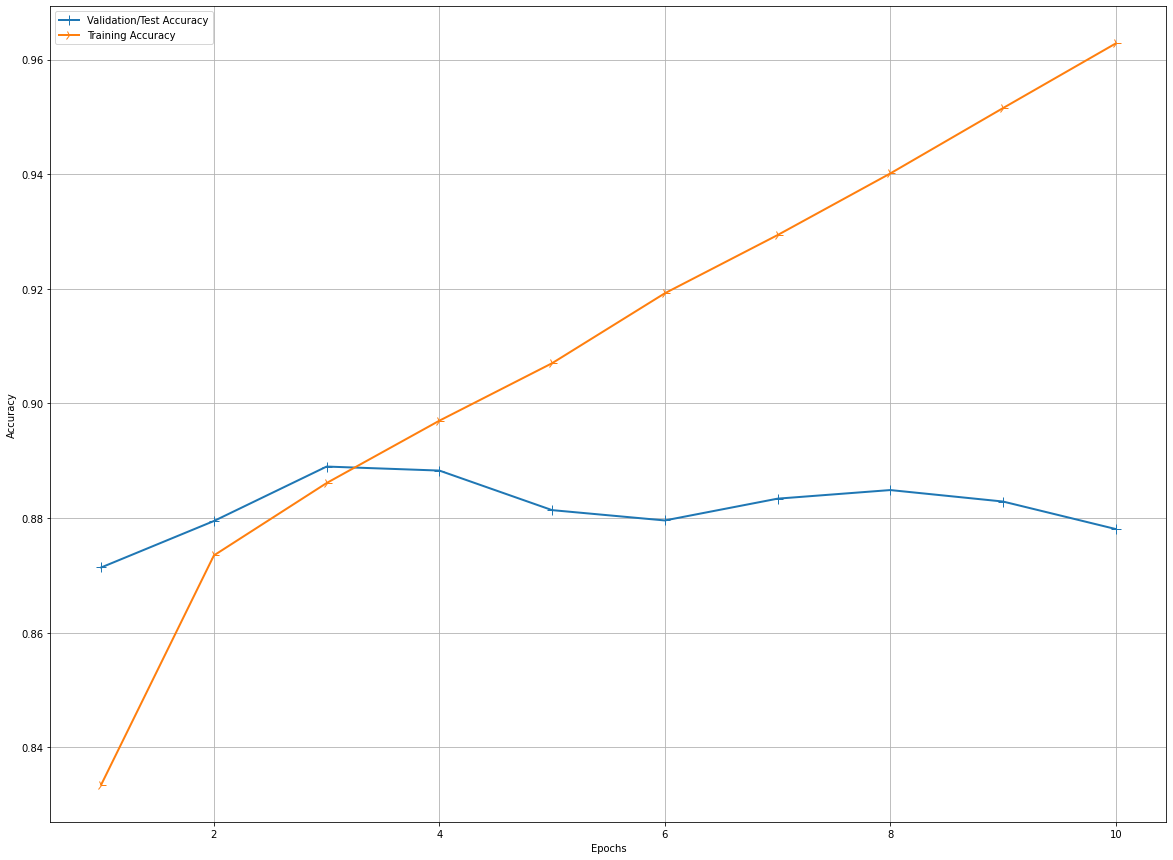

In [52]:
plot_val_acc(history.history)

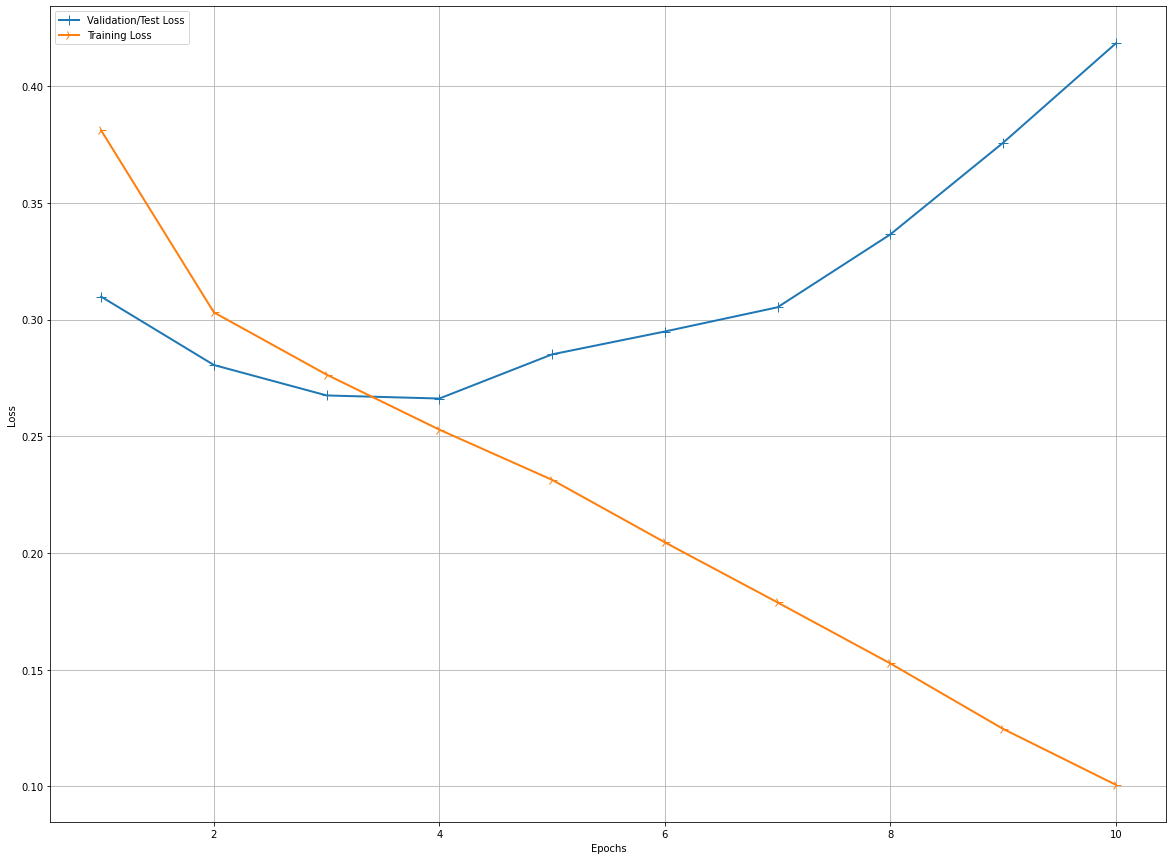

In [53]:
plot_val_loss(history.history)

In [54]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.4183 - accuracy: 0.8781


# Time series

Monthly beer production from https://www.kaggle.com/shenba/time-series-datasets

In [55]:
df_time = pd.read_csv('./datasets/monthly-beer-production-in-austr.csv', usecols=[1], engine='python')
df_time.head()

,Monthly beer production
0,93.2
1,96.0
2,95.2
3,77.1
4,70.9


In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_time = scaler.fit_transform(df_time)

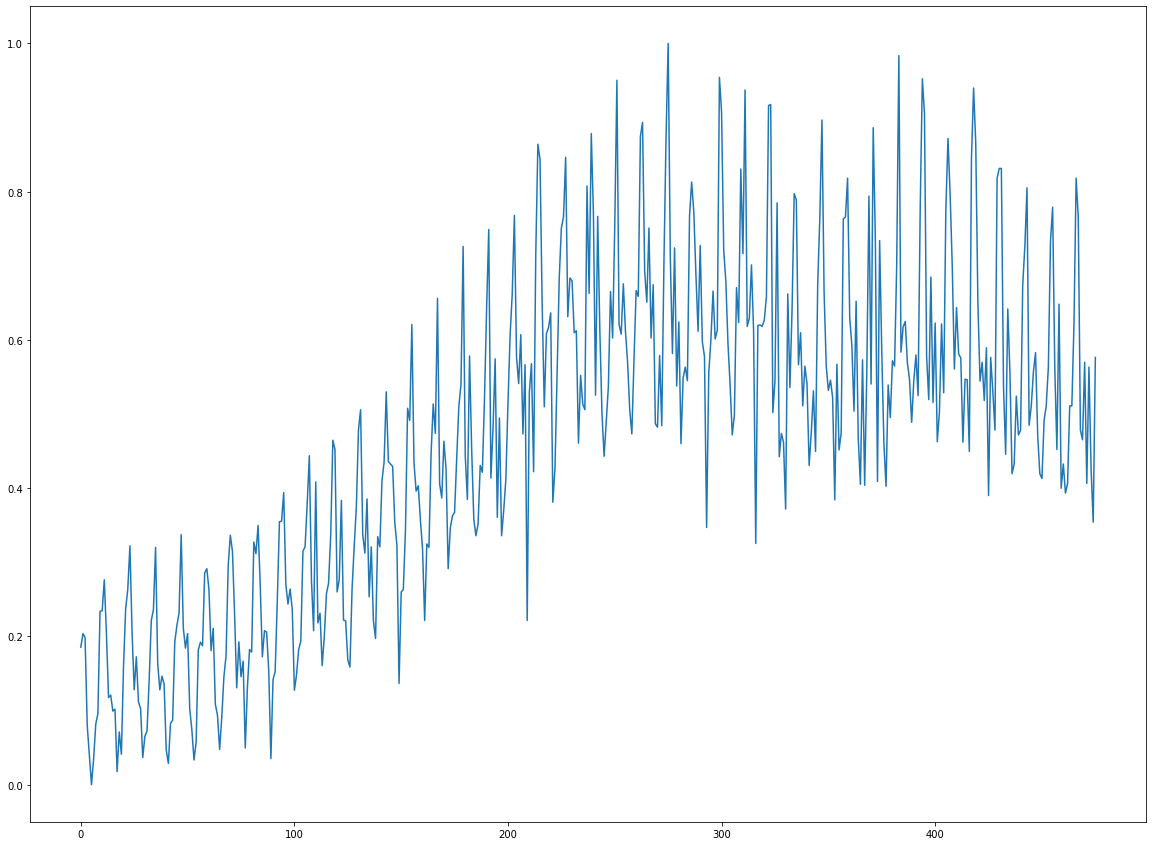

In [57]:
plt.plot(df_time)
plt.show()

In [58]:
n = len(df_time)
train_df = df_time[0:int(n*0.8)]
test_df = df_time[int(n*0.8):]

In [59]:
def time_generator(dataset):
    x, y = [], []
    for i in range(len(dataset) - 1):
        a = dataset[i:(i + 1), 0]
        x.append(a)
        y.append(dataset[i + 1, 0])
    
    return np.array(x), np.array(y)

In [60]:
train_x, train_y = time_generator(train_df)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))

test_x, test_y = time_generator(test_df)
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [61]:
model = Sequential()

model.add(LSTM(8, activation='tanh', input_shape=(1, 1)))
model.add(Dense(1))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
model.compile(optimizer='adam', loss='mse')

In [63]:
history = model.fit(train_x, train_y, epochs=20, batch_size=1, verbose=True)

Epoch 1/20
379/379 [==============================] - 3s 4ms/step - loss: 0.1403
Epoch 2/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0272
Epoch 3/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0217
Epoch 4/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0166
Epoch 5/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0162
Epoch 6/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0150
Epoch 7/20
379/379 [==============================] - 1s 4ms/step - loss: 0.0139
Epoch 8/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0152
Epoch 9/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0134
Epoch 10/20
379/379 [==============================] - 2s 5ms/step - loss: 0.0158
Epoch 11/20
379/379 [==============================] - 2s 5ms/step - loss: 0.0150
Epoch 12/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0139
Epoch 13/20
379/379 [====

In [64]:
def plot_loss(his):
    loss_values = his['loss']
    epochs = range(1, len(loss_values) + 1)

    line2 = plt.plot(epochs, loss_values, label='Training Loss')
    plt.setp(line2, linewidth=2.0, marker = '+', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()

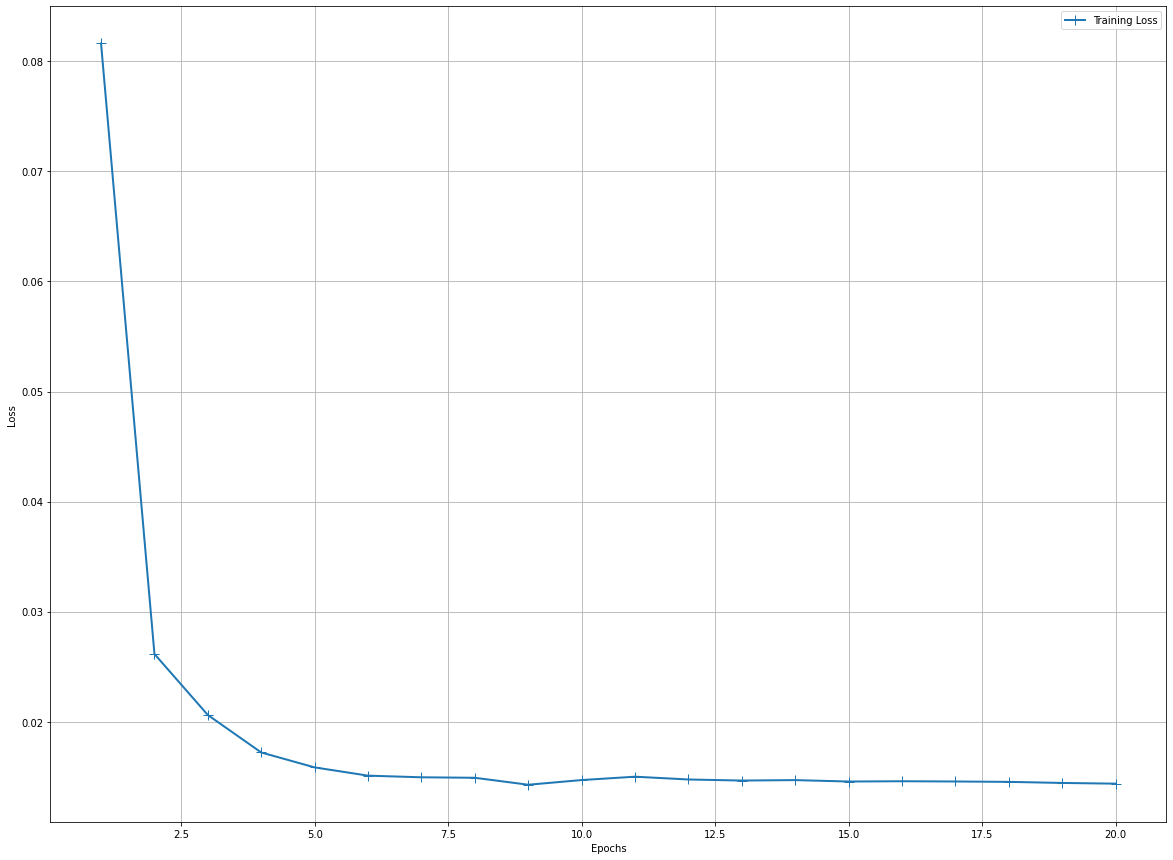

In [65]:
plot_loss(history.history)

In [66]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [67]:
predict_train = scaler.inverse_transform(predict_train)
train_y = scaler.inverse_transform([train_y])

predict_test = scaler.inverse_transform(predict_test)
test_y = scaler.inverse_transform([test_y])

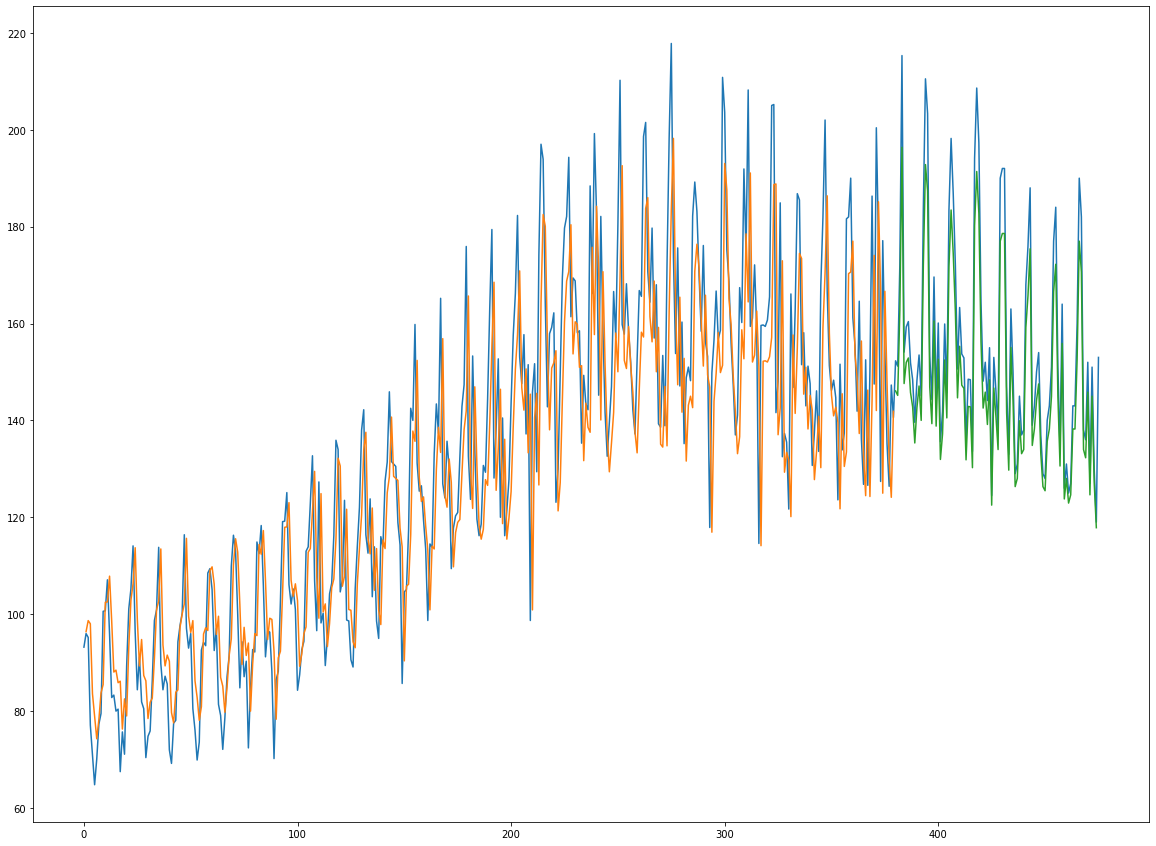

In [68]:
predict_train_plot = np.empty_like(df_time)
predict_train_plot[:, :] = np.nan
predict_train_plot[1:len(predict_train) + 1, :] = predict_train

predict_test_plot = np.empty_like(df_time)
predict_test_plot[:, :] = np.nan
predict_test_plot[len(predict_train) + 1:len(df_time) - 1, :] = predict_test

plt.plot(scaler.inverse_transform(df_time))
plt.plot(predict_train_plot)
plt.plot(predict_test_plot)
plt.show()

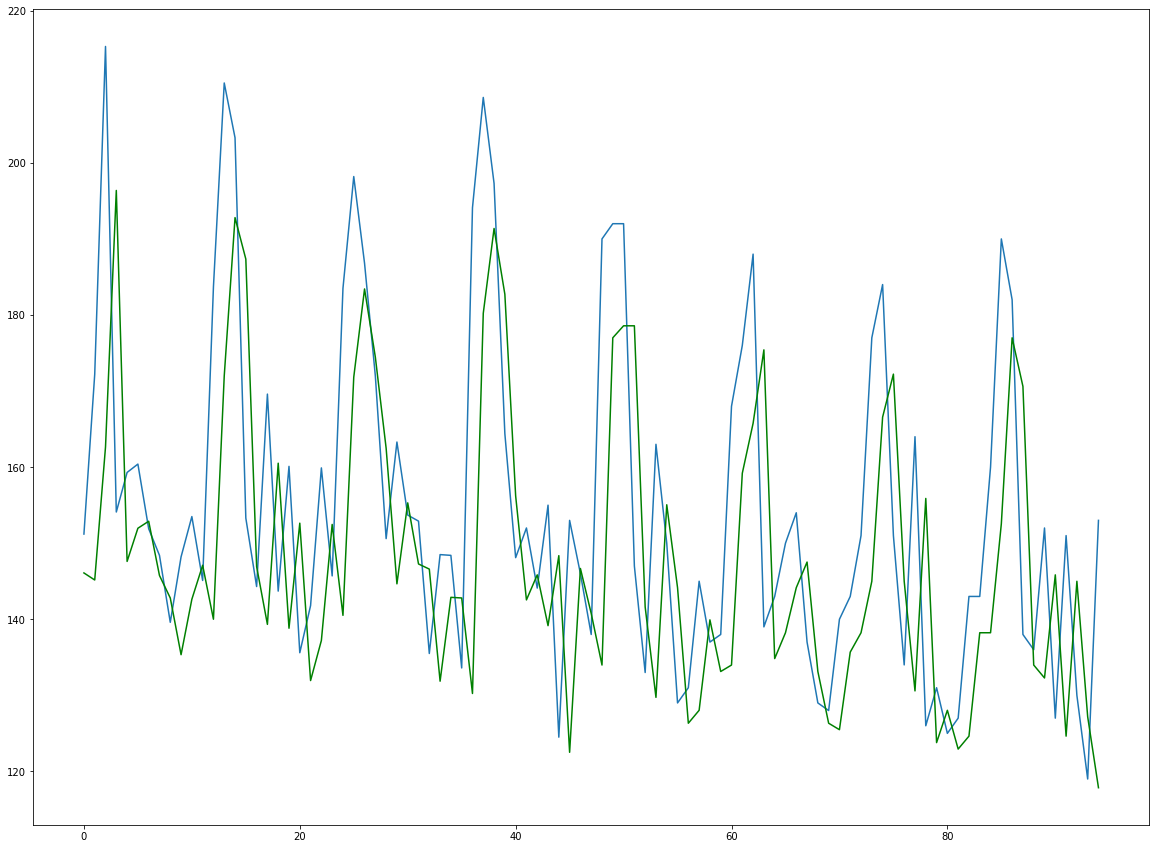

In [69]:
plt.plot(scaler.inverse_transform(df_time[-len(predict_test):]))
plt.plot(predict_test, c="green")
plt.show()

# Generating text

In [72]:
df.head()

,review,sentiment,review_tokens,review_stem,review_lemm,tags,review_bigrams,review_trigrams
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...","[one, reviewer, mentioned, watching, 1, oz, ep...","[(one, CD), (reviewers, NNS), (mentioned, VBD)...","[(one, reviewers), (reviewers, mentioned), (me...","[(one, reviewers, mentioned), (reviewers, ment..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[(wonderful, little), (little, production), (p...","[(wonderful, little, production), (little, pro..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[(thought, wonderful), (wonderful, way), (way,...","[(thought, wonderful, way), (wonderful, way, s..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...","[basically, there, family, little, boy, jake, ...","[(basically, RB), (theres, NNS), (family, NN),...","[(basically, theres), (theres, family), (famil...","[(basically, theres, family), (theres, family,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti...","[(petter, matteis), (matteis, love), (love, ti...","[(petter, matteis, love), (matteis, love, time..."


In [21]:
print(df.review[2])

i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends


## Tokens and vocab

**Reducing size**

In [22]:
data = df[0:1000]

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.review)

In [24]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size: {}".format(vocab_size))

Vocab size: 21458


## Sequences

In [25]:
sequences = []

for review in data.review:
    token_list = tokenizer.texts_to_sequences([review])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

sequences[:10]

[[28, 4],
 [28, 4, 1],
 [28, 4, 1, 78],
 [28, 4, 1, 78, 2380],
 [28, 4, 1, 78, 2380, 43],
 [28, 4, 1, 78, 2380, 43, 786],
 [28, 4, 1, 78, 2380, 43, 786, 11],
 [28, 4, 1, 78, 2380, 43, 786, 11, 105],
 [28, 4, 1, 78, 2380, 43, 786, 11, 105, 137],
 [28, 4, 1, 78, 2380, 43, 786, 11, 105, 137, 38]]

In [38]:
print("Sequences size: {}".format(len(sequences)))

Sequences size: 225242


In [42]:
def generate_sequences(input_sequences):
    max_sequence = max([len(x) for x in input_sequences])
    padded_sequences = pad_sequences(input_sequences, maxlen=max_sequence, padding='pre')
    
    next_words = padded_sequences[:, :-1]
    label = padded_sequences[:, -1]
    
    return next_words, label, max_sequence

next_words, label, max_sequence = generate_sequences(sequences)
label = to_categorical(label, num_classes = vocab_size)

## Model

In [15]:
model = Sequential()
    
model.add(Embedding(vocab_size, 50, input_length = max_sequence - 1))
model.add(LSTM(50))

model.add(Dropout(0.3))
model.add(Dense(vocab_size, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1277, 50)          1072900   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 21458)             1094358   
Total params: 2,187,458
Trainable params: 2,187,458
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [17]:
epochs = 50
batch_size = 512

In [18]:
history = model.fit(
    predictors, 
    label, 
    epochs = epochs, 
    batch_size = batch_size,
    verbose = True)

Epoch 1/50
440/440 [==============================] - 81s 175ms/step - loss: 8.0333
Epoch 2/50
440/440 [==============================] - 82s 187ms/step - loss: 6.9673
Epoch 3/50
440/440 [==============================] - 78s 177ms/step - loss: 6.8745
Epoch 4/50
440/440 [==============================] - 75s 172ms/step - loss: 6.7740
Epoch 5/50
440/440 [==============================] - 78s 178ms/step - loss: 6.6781
Epoch 6/50
440/440 [==============================] - 79s 180ms/step - loss: 6.6013
Epoch 7/50
440/440 [==============================] - 83s 188ms/step - loss: 6.4894
Epoch 8/50
440/440 [==============================] - 96s 218ms/step - loss: 6.4086
Epoch 9/50
440/440 [==============================] - 86s 195ms/step - loss: 6.3075
Epoch 10/50
440/440 [==============================] - 87s 197ms/step - loss: 6.2290
Epoch 11/50
440/440 [==============================] - 78s 177ms/step - loss: 6.1530
Epoch 12/50
440/440 [==============================] - 81s 184ms/step - lo

In [26]:
model.save("lstm_generate.h5")
np.save('lstm_generate_history.npy', history.history)

In [5]:
model = load_model("lstm_generate.h5")
history = np.load('lstm_generate_history.npy', allow_pickle='TRUE').item()

In [8]:
def plot_loss(his):
    loss_values = his['loss']
    epochs = range(1, len(loss_values) + 1)

    line2 = plt.plot(epochs, loss_values, label='Training Loss')
    plt.setp(line2, linewidth=2.0, marker = '+', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()

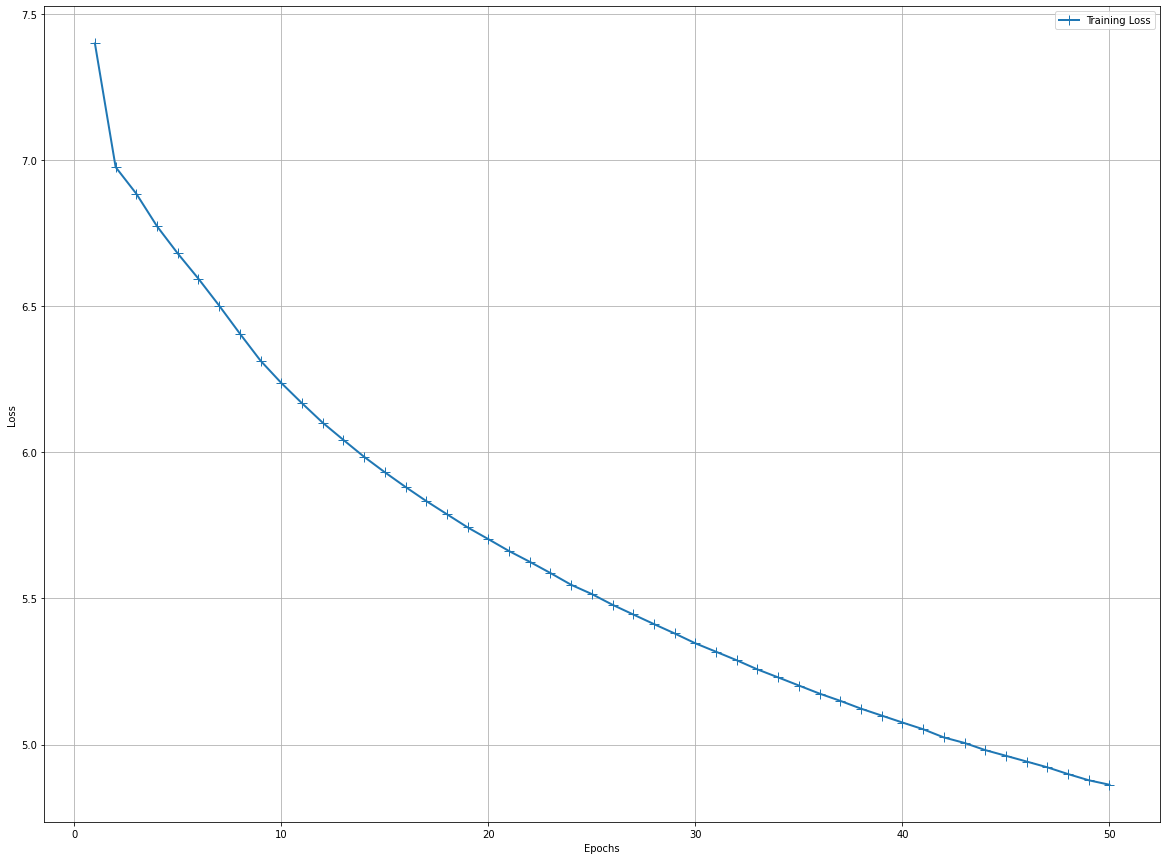

In [9]:
plot_loss(history)

## Generate

In [36]:
def generate(text, n):
    for i in range(n):
        text_tokens = tokenizer.texts_to_sequences([text])
        text_tokens = pad_sequences(text_tokens, maxlen=max_sequence - 1, padding='pre')
        
        predicted = np.argmax(model.predict(text_tokens), axis=-1)
        
        text += " "
        for w, idx in tokenizer.word_index.items():
            if idx == predicted:
                text += w
                break
                
    return text.title()

In [43]:
print(generate("very bad comedy", 15))

Very Bad Comedy I Have Seen The Movie And I Have Been A Lot Of The Movie And


# Translating text

In [709]:
df_ende = pd.read_csv('./datasets/deu.txt', sep='\t', usecols=[0, 1])
df_ende.columns = ['en', 'de']
df_ende.head()

,en,de
0,Hi.,Hallo!
1,Hi.,Grüß Gott!
2,Run!,Lauf!
3,Run.,Lauf!
4,Wow!,Potzdonner!


In [710]:
df_ende.isnull().sum()

en    0
de    0
dtype: int64

Text(0.5, 1.0, 'German sentence length')

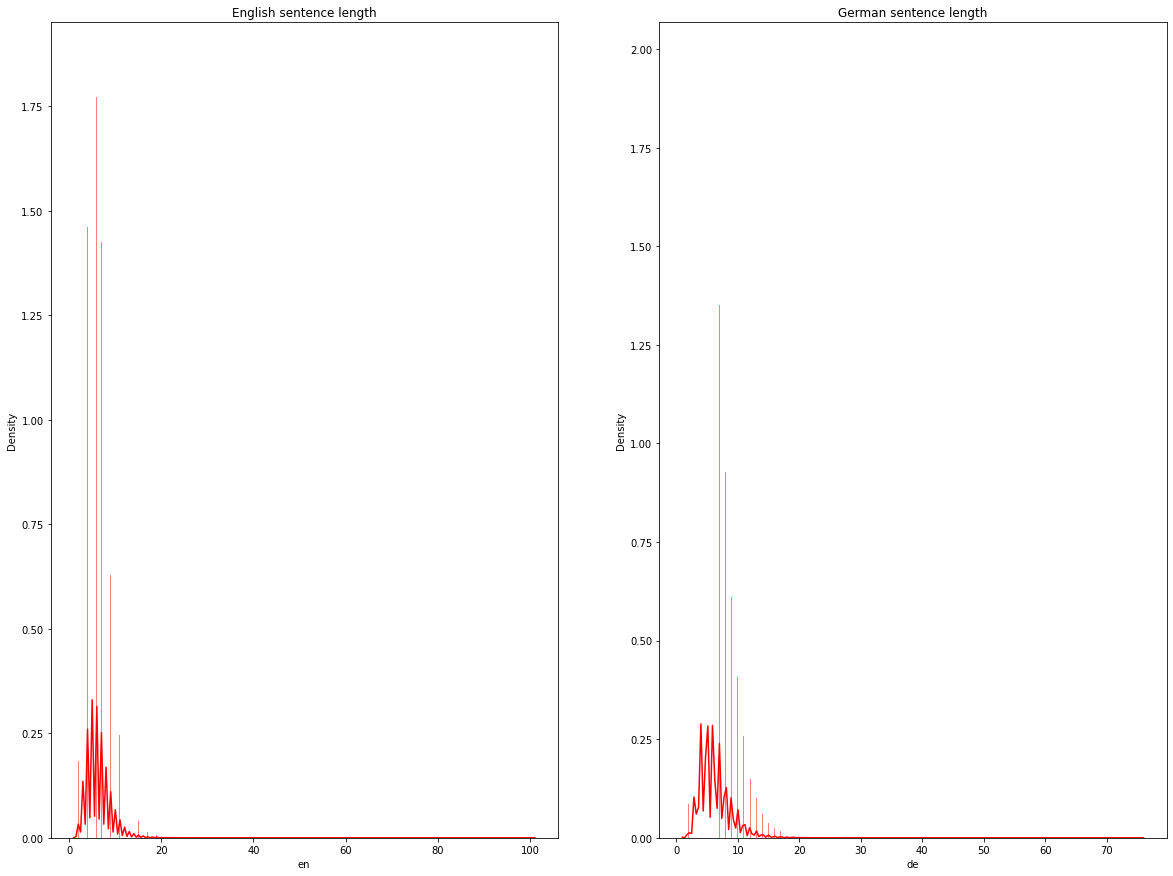

In [711]:
plt.subplot(1, 2, 1)
sns.histplot(df_ende['en'].str.split().apply(len), color="red", label="English sentence length", kde=True, stat="density", linewidth=0)
plt.title('English sentence length')

plt.subplot(1, 2, 2)
sns.histplot(df_ende['de'].str.split().apply(len), color="red", label="German sentence length", kde=True, stat="density", linewidth=0)
plt.title('German sentence length')

## Cleaning

In [712]:
df_ende.en = df_ende.en.apply(lambda s: s.lower())
df_ende.de = df_ende.de.apply(lambda s: s.lower())

df_ende.head()

,en,de
0,hi.,hallo!
1,hi.,grüß gott!
2,run!,lauf!
3,run.,lauf!
4,wow!,potzdonner!


In [713]:
pattern = r'[^a-zA-z0-9\s]'

df_ende.en = df_ende.en.apply(lambda s: re.sub(pattern, '', s))
df_ende.de = df_ende.de.apply(lambda s: re.sub(pattern, '', s))
df_ende.head()

,en,de
0,hi,hallo
1,hi,gr gott
2,run,lauf
3,run,lauf
4,wow,potzdonner


## Tokenize, generate sequences

In [714]:
en_tokenizer = Tokenizer()
en_tokenizer.fit_on_texts(df_ende.en)

de_tokenizer = Tokenizer()
de_tokenizer.fit_on_texts(df_ende.de)

In [715]:
max_sequence_len = 8
print("Max sequence len: {}".format(max_sequence_len))

Max sequence len: 8


In [716]:
en_vocab_size = len(en_tokenizer.word_index) + 1
print("English vocab size: {}".format(en_vocab_size))

de_vocab_size = len(de_tokenizer.word_index) + 1
print("German vocab size: {}".format(de_vocab_size))

English vocab size: 16653
German vocab size: 35525


In [717]:
train_ende, test_ende = train_test_split(df_ende, test_size=0.25, random_state = 42)

In [718]:
train_x = en_tokenizer.texts_to_sequences(train_ende.en)
train_x = pad_sequences(train_x, maxlen = max_sequence_len, padding='post')

train_y = de_tokenizer.texts_to_sequences(train_ende.de)
train_y = pad_sequences(train_y, maxlen = max_sequence_len, padding='post')

In [719]:
test_x = en_tokenizer.texts_to_sequences(test.en)
test_x = pad_sequences(test_x, maxlen = max_sequence_len, padding='post')

test_y = de_tokenizer.texts_to_sequences(test.de)
test_y = pad_sequences(test_y, maxlen = max_sequence_len, padding='post')

## Model

In [720]:
model = Sequential()

model.add(Embedding(en_vocab_size, 512, input_length=max_sequence_len, mask_zero=True))
model.add(LSTM(512))

model.add(RepeatVector(max_sequence_len))

model.add(LSTM(512, return_sequences=True))
model.add(Dense(de_vocab_size, activation='softmax'))

print(model.summary())

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_56 (Embedding)     (None, 8, 512)            8526336   
_________________________________________________________________
lstm_100 (LSTM)              (None, 512)               2099200   
_________________________________________________________________
repeat_vector_47 (RepeatVect (None, 8, 512)            0         
_________________________________________________________________
lstm_101 (LSTM)              (None, 8, 512)            2099200   
_________________________________________________________________
dense_55 (Dense)             (None, 8, 35525)          18224325  
Total params: 30,949,061
Trainable params: 30,949,061
Non-trainable params: 0
_________________________________________________________________
None


In [721]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [722]:
epochs = 5
batch_size = 256

In [723]:
history = model.fit(
    train_x, 
    train_y.reshape(*train_y.shape, 1),
    epochs = epochs, 
    batch_size = batch_size,
    validation_split = 0.2,
    verbose = True)

Epoch 1/5
520/520 [==============================] - 92s 162ms/step - loss: 6.2216 - accuracy: 0.2588 - val_loss: 5.4401 - val_accuracy: 0.2849
Epoch 2/5
520/520 [==============================] - 78s 150ms/step - loss: 5.3606 - accuracy: 0.2838 - val_loss: 5.2781 - val_accuracy: 0.2886
Epoch 3/5
520/520 [==============================] - 80s 154ms/step - loss: 5.1945 - accuracy: 0.2895 - val_loss: 5.1878 - val_accuracy: 0.3011
Epoch 4/5
520/520 [==============================] - 79s 151ms/step - loss: 5.0906 - accuracy: 0.3004 - val_loss: 5.0353 - val_accuracy: 0.3226
Epoch 5/5
520/520 [==============================] - 79s 152ms/step - loss: 4.8951 - accuracy: 0.3279 - val_loss: 4.7515 - val_accuracy: 0.3559


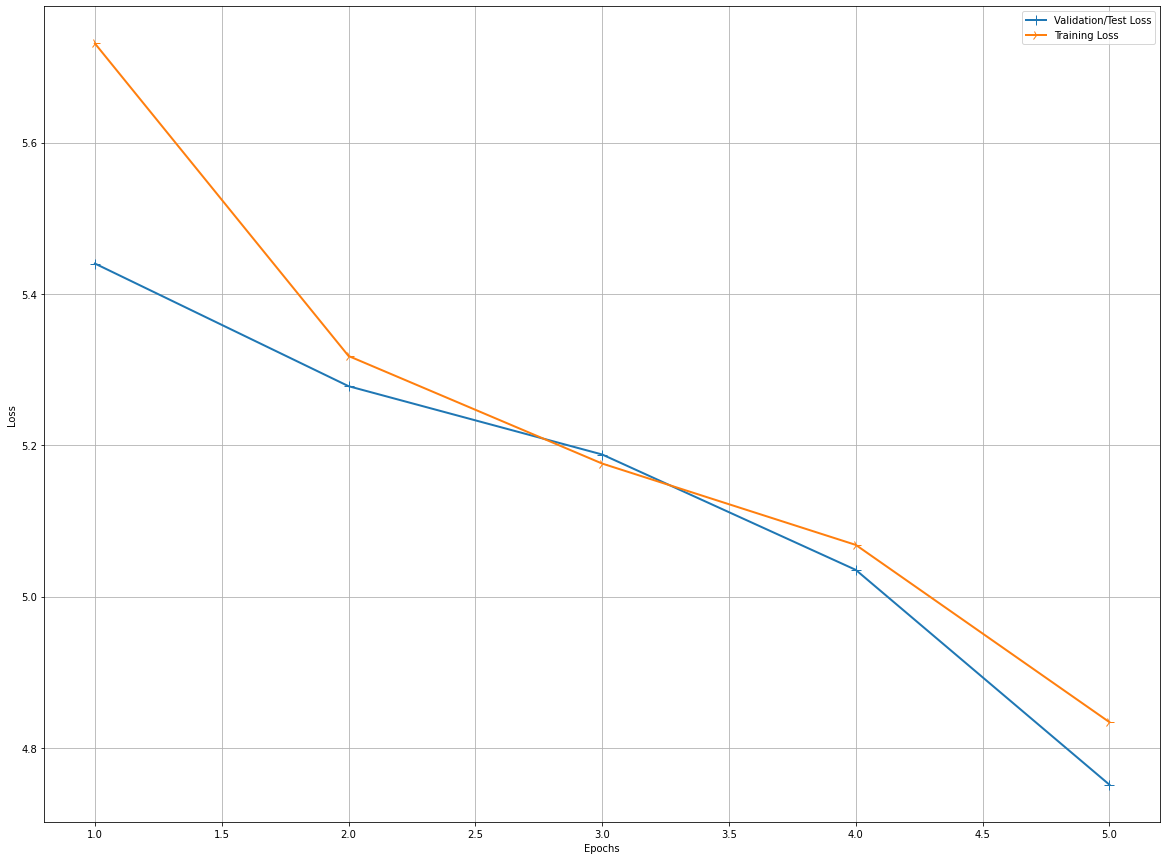

In [724]:
plot_val_loss(history.history)

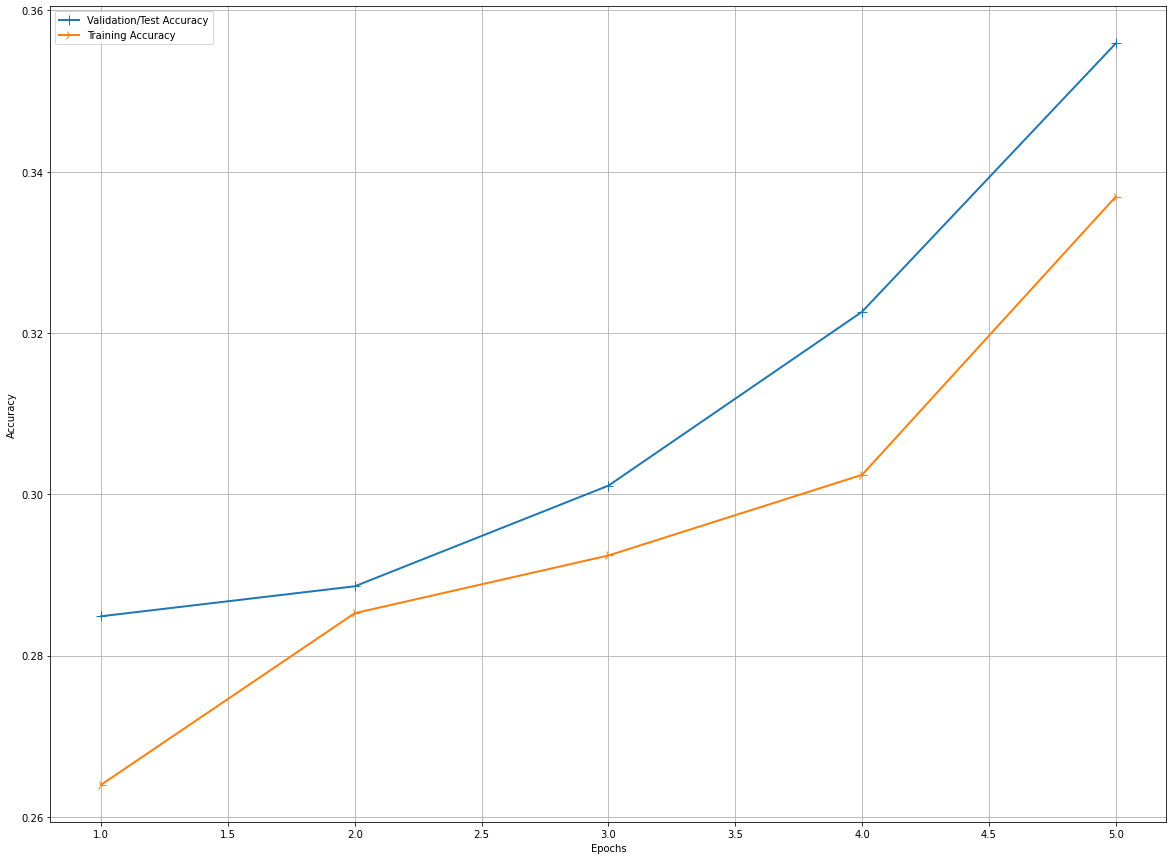

In [725]:
plot_val_acc(history.history)

In [726]:
loss, accuracy = model.evaluate(test_x, test_y)

1731/1731 [==============================] - 32s 15ms/step - loss: 4.7794 - accuracy: 0.3531
